In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('homeprices_1.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# Using pandas get_dummies() methods

In [3]:
df1=pd.get_dummies(df.town)
df1

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
df=pd.concat([df,df1],axis='columns')
df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
df=df.drop(['town','west windsor'],axis=1)
df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model=LinearRegression()

In [8]:
x=df.drop(['price'],axis=1)
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [9]:
y=df['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [10]:
model.fit(x,y)

LinearRegression()

In [11]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [12]:
model.intercept_

249790.36766292533

In [13]:
model.predict([[2800,0,1]])

array([590775.63964739])

In [14]:
model.predict([[3400,0,0]])

array([681241.66845839])

In [15]:
model.score(x,y)

0.9573929037221873

# One hot encoding using scikit-learn OneHotEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
data=pd.read_csv('homeprices_1.csv')
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [18]:
data_1=le.fit_transform(data.town)
data_1

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [19]:
data['town']=data_1

In [20]:
data

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [21]:
x=data[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [22]:
y=data.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
transformer=ColumnTransformer( transformers=[('town',OneHotEncoder(categories='auto'),[0])],remainder='passthrough')

In [25]:
x=transformer.fit_transform(x,y)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [26]:
x=x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [27]:
model.fit(x,y)

LinearRegression()

In [28]:
model.predict([[1,0,2800]])

array([590775.63964739])

# Excercise

In [29]:
df=pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [30]:
import matplotlib.pyplot as plt

In [31]:
x=df.drop(['Car Model','Sell Price($)','Mileage'],axis=1)
x

,Age(yrs)
0,6
1,3
2,5
3,2
4,4
5,5
6,5
7,6
8,8
9,6


In [32]:
y=df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

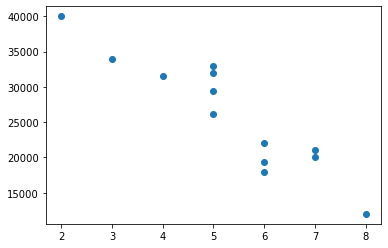

In [33]:
%matplotlib inline
plt.scatter(x,y)

In [34]:
df1=pd.get_dummies(df)
df1

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [35]:
df1=df1.drop(['Car Model_Mercedez Benz C class'],axis=1)
df1

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [37]:
x=df1.drop(['Sell Price($)'],axis=1)
x

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [38]:
y=df1['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [39]:
model.fit(x,y)

LinearRegression()

In [40]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [41]:
model.intercept_

58976.625968537235

In [44]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [45]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [47]:
model.score(x,y)

0.9417050937281083